In [ ]:
# Basically Power transformer are of two types first is Box-Cox and second is Yeo-Johnson
#Box-Cox
# Works only for strictly positive data (y > 0)
# Fails if data has 0 or negative values


 

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

In [4]:
df=pd.read_csv('concrete_data.csv')

In [5]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [7]:
from sklearn.metrics import r2_score

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [12]:
import scipy.stats as stats  
#what will this do?  prvides Statistical functions (mean, median, mode, standard deviation, etc.)

In [13]:
df.shape

(1030, 9)

In [15]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [17]:
#there is no missing value so need of fill with mean , meadian , mode 

In [19]:
  df.describe()   # used to check whethe rthere are negativeor ,zero , mean , std, min, max. value present in the data

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [35]:

X=df.drop(columns=['Strength'])
y=df.iloc[:,-1]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
# Applying Regression without any transformation
lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

r2_score(y_test,y_pred)

0.627553179231485

In [40]:
#cross checkinh wioth cross valoidation score 
np.mean(cross_val_score(lr,X,y,scoring='r2'))

np.float64(0.46099404916628633)

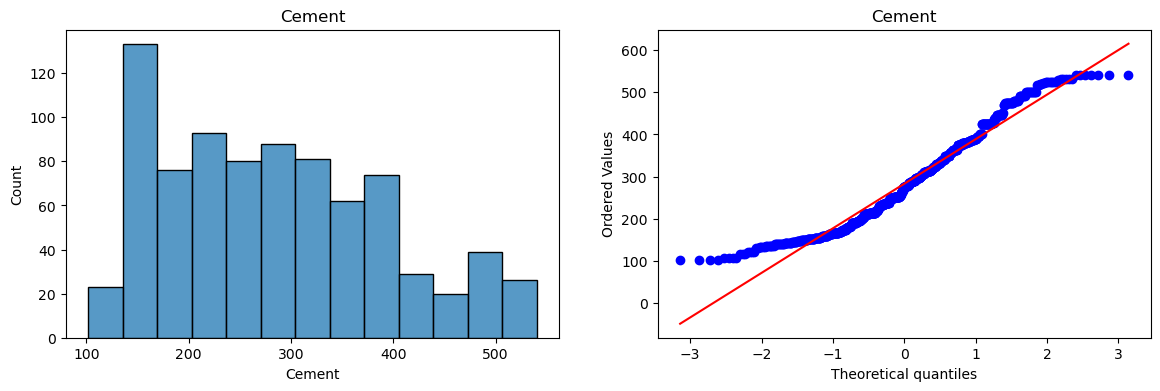

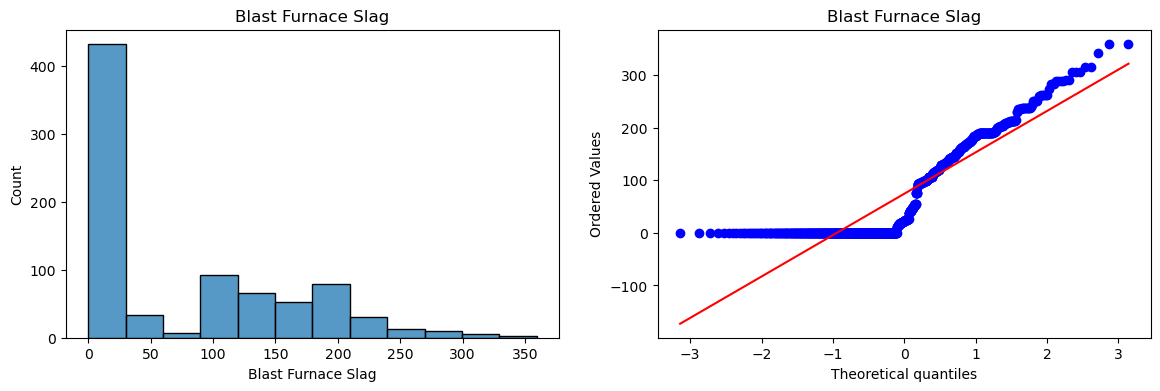

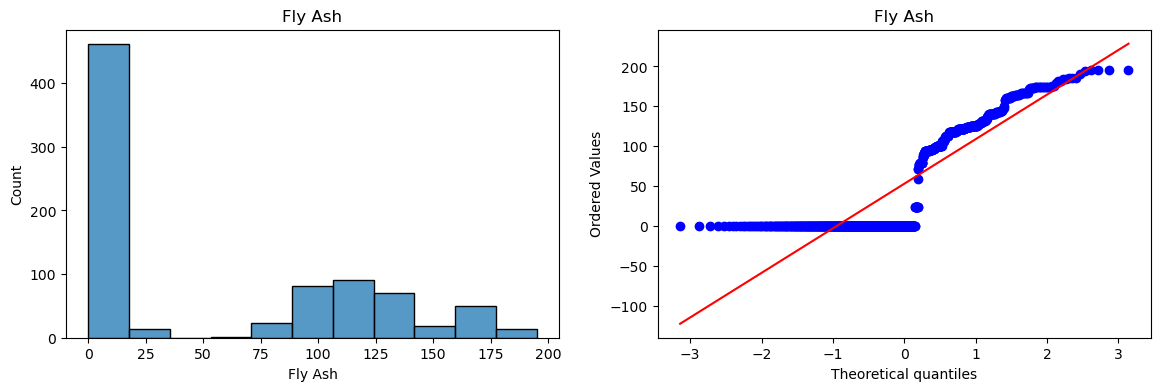

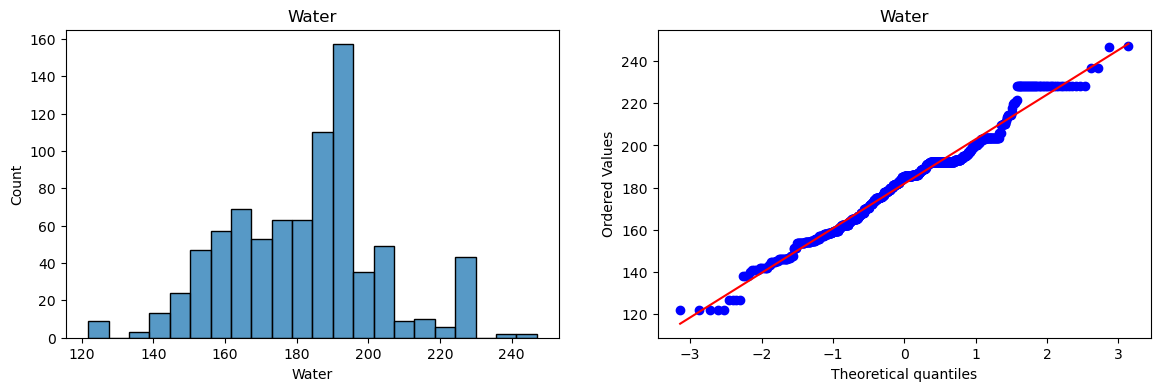

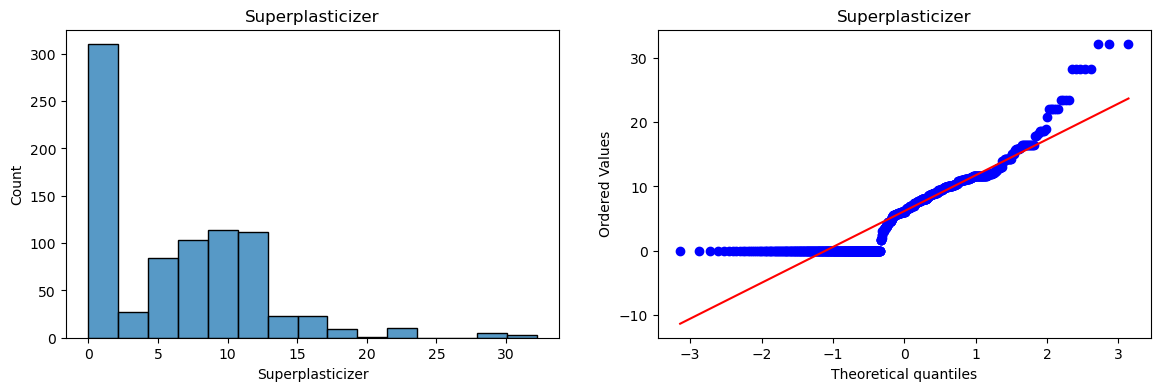

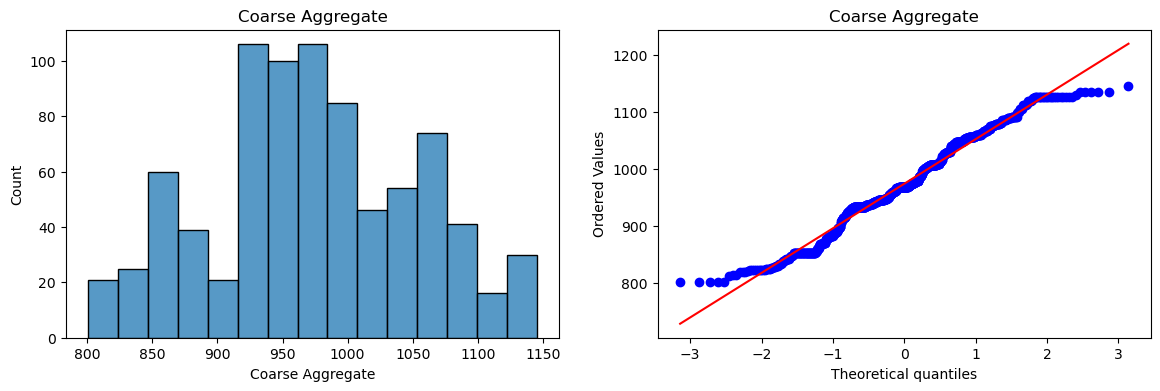

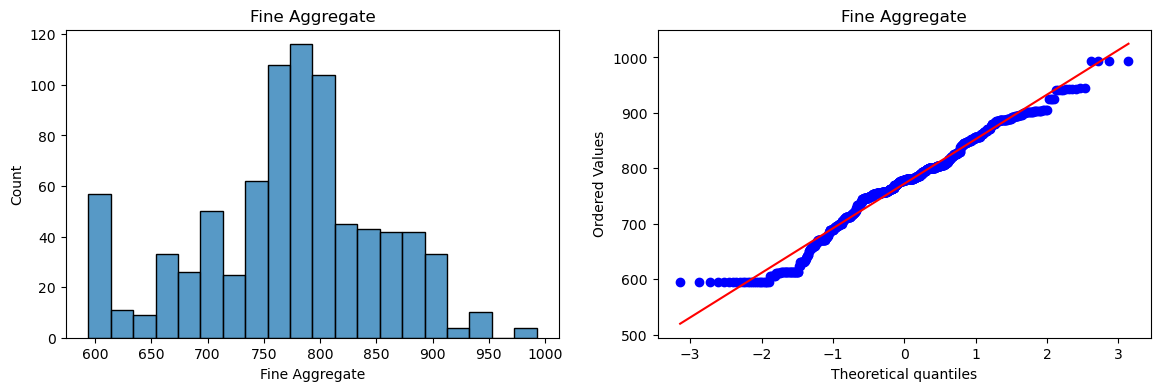

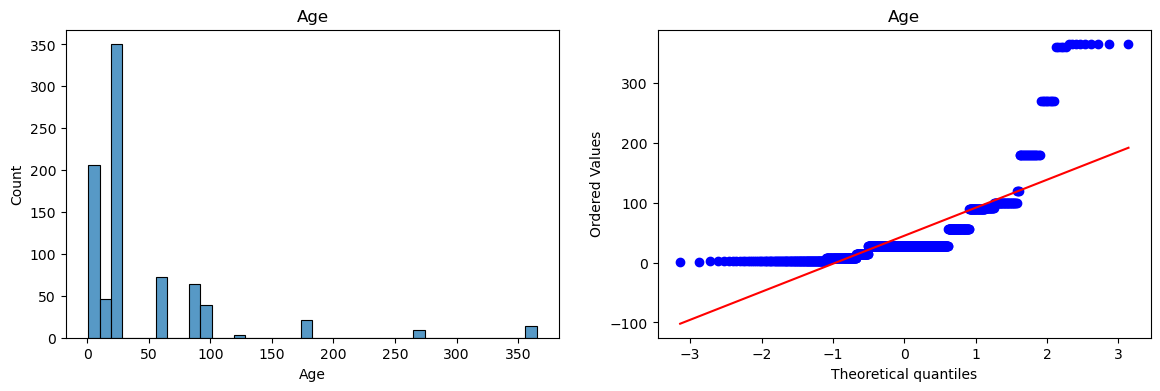

In [44]:
# Plotting the distplots without any transformation
import matplotlib.pyplot  as plt

for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [48]:
#aplying Box-Cox Transformer
pt=PowerTransformer(method='box-cox')
X_train_transformed=pt.fit_transform(X_train+0.0000001)
X_test_transformed=pt.transform(X_test+0.000000001)
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas': pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.022767
2,Fly Ash,-0.034635
3,Water,0.772682
4,Superplasticizer,0.087141
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


In [ ]:
# the above box-cox-lambdas is the value  of lamda in  formula of Box_Cox


In [49]:
lr=LinearRegression()

In [50]:
lr.fit(X_train_transformed,y_train)

LinearRegression()

In [51]:
y_pred2=lr.predict(X_test_transformed)

In [53]:
r2_score(y_test,y_pred2)

0.7922243572066714

In [ ]:
#Smililarly Yeo_johnson Trand=sformation applyies 